### MSDS 422 - Module 3 Assignment 1: House Prices (Kaggle)
# Yue Yu
github: https://github.com/yy383124955/msds422/tree/main/Week%203
## Data overview

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set()

## The comparative data from the last assignment

In [2]:
df_train_last = pd.read_csv('train.csv')
df_test_last = pd.read_csv('test.csv')

mean_price_neighborhood_last = df_train_last.groupby('Neighborhood')['SalePrice'].mean().reset_index(name="NeighborhoodMean")

# Add Neighobrhood Average Sales Price feature to train data
new_df_train_last = pd.merge(df_train_last, mean_price_neighborhood_last, on=['Neighborhood'])
x_train_last = new_df_train_last[['LotArea','GrLivArea','GarageArea','TotalBsmtSF','NeighborhoodMean']]
y_train_last = new_df_train_last['SalePrice']

model_last = LinearRegression()
model_last.fit(x_train_last,y_train_last)
print(model_last.coef_)

[ 0.25725774 55.38230298 53.54687536 32.18812173  0.55368595]


In [3]:
# Find the Learning curve
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

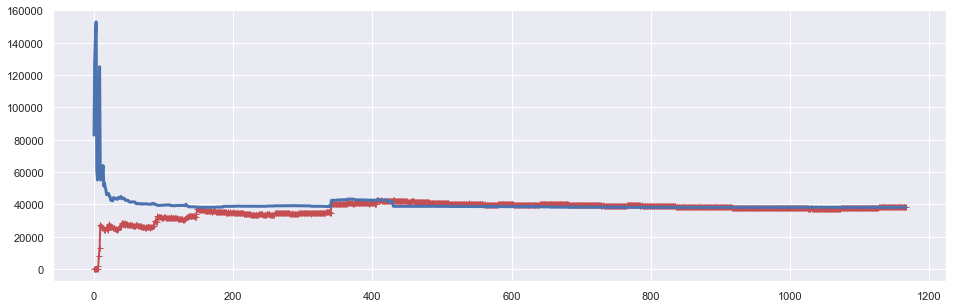

In [4]:
plt.figure(figsize=(16, 5))
plot_learning_curves(model_last, x_train_last, y_train_last)

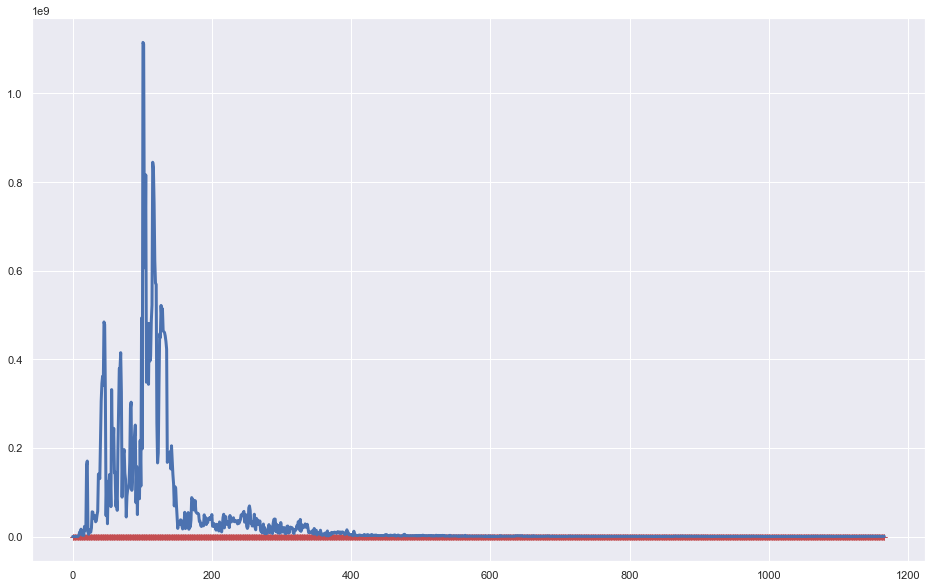

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))
plt.figure(figsize=(16, 10))
plot_learning_curves(polynomial_regression, x_train_last, y_train_last)


In [6]:
# Add Neighobrhood Average Sales Price feature to test data
new_df_test_last = pd.merge(df_test_last, mean_price_neighborhood_last, on=['Neighborhood'])
#check and clean nan for each colume in test
new_df_test_last['LotArea'].isnull().sum()
new_df_test_last['GrLivArea'].isnull().sum()
new_df_test_last['GarageArea'].isnull().sum()
new_df_test_last['GarageArea'] = new_df_test_last['GarageArea'].fillna(0)
new_df_test_last['TotalBsmtSF'].isnull().sum()
new_df_test_last['TotalBsmtSF'] = new_df_test_last['TotalBsmtSF'].fillna(0)
new_df_test_last['NeighborhoodMean'].isnull().sum()

0

In [7]:
x_kaggle_test_last = new_df_test_last[['LotArea','GrLivArea','GarageArea','TotalBsmtSF','NeighborhoodMean']]
predictions_kaggle_last = model_last.predict(x_kaggle_test_last)
new_df_test_last['SalePrice'] = predictions_kaggle_last
new_df_test_last[['Id', 'SalePrice']].to_csv('predictions-1.csv', index=False)

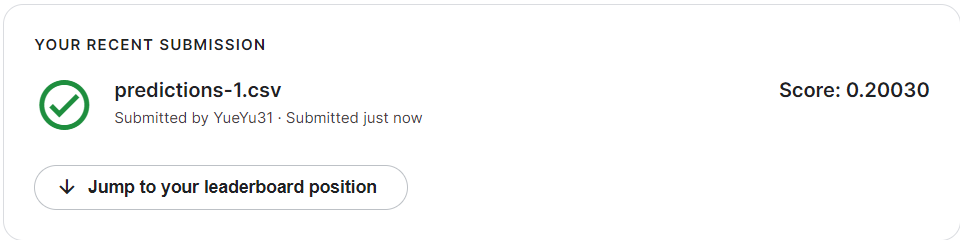

## Ridge Regression

In [8]:
# The Cholesky model is used for matrix decomposition
from sklearn.linear_model import Ridge

# Import data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

mean_price_neighborhood = df_train.groupby('Neighborhood')['SalePrice'].mean().reset_index(name="NeighborhoodMean")

# Add Neighobrhood Average Sales Price feature to train data
new_df_train = pd.merge(df_train, mean_price_neighborhood, on=['Neighborhood'])
x_train = new_df_train[['LotArea','GrLivArea','GarageArea','TotalBsmtSF','NeighborhoodMean']]
y_train = new_df_train['SalePrice']

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x_train, y_train)
print(ridge_reg.coef_)

[ 0.25725774 55.38230292 53.54687427 32.18812176  0.55368595]


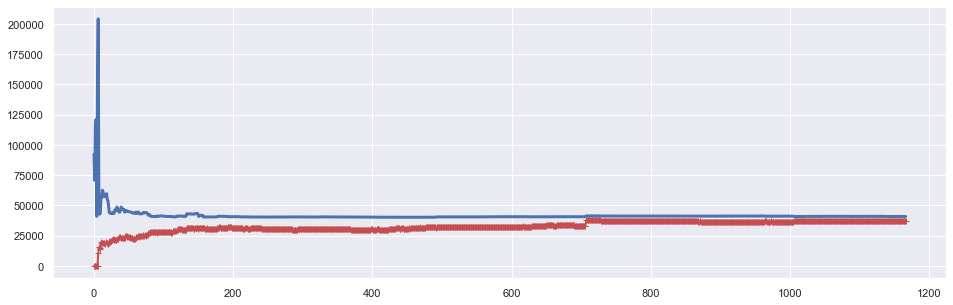

In [9]:
# Find the Learning curve
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
plt.figure(figsize=(16, 5))
plot_learning_curves(ridge_reg, x_train, y_train)

In [10]:
# Add Neighobrhood Average Sales Price feature to test data
new_df_test = pd.merge(df_test, mean_price_neighborhood, on=['Neighborhood'])
#check and clean nan for each colume in test
new_df_test['LotArea'].isnull().sum()
new_df_test['GrLivArea'].isnull().sum()
new_df_test['GarageArea'].isnull().sum()
new_df_test['GarageArea'] = new_df_test['GarageArea'].fillna(0)
new_df_test['TotalBsmtSF'].isnull().sum()
new_df_test['TotalBsmtSF'] = new_df_test['TotalBsmtSF'].fillna(0)
new_df_test['NeighborhoodMean'].isnull().sum()

0

In [11]:
x_kaggle_test = new_df_test[['LotArea','GrLivArea','GarageArea','TotalBsmtSF','NeighborhoodMean']]
predictions_kaggle = ridge_reg.predict(x_kaggle_test)
new_df_test['SalePrice'] = predictions_kaggle
new_df_test[['Id', 'SalePrice']].to_csv('predictions-2.csv', index=False)

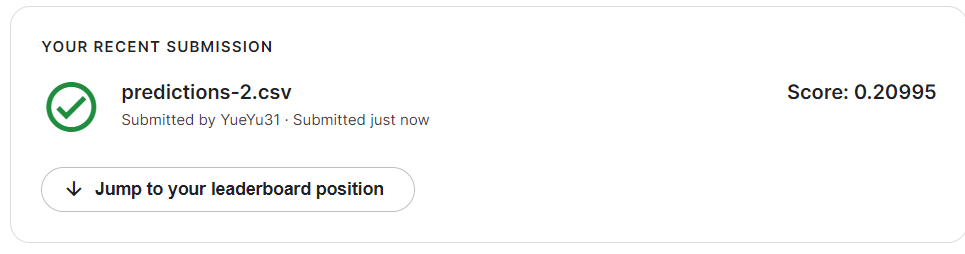

In [12]:
# Use the random gradient model
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", max_iter=1000)
sgd_reg.fit(x_train, y_train.ravel())
print(ridge_reg.coef_)

[ 0.31817246 51.19714693 49.03592853 32.10751689  0.56725317]


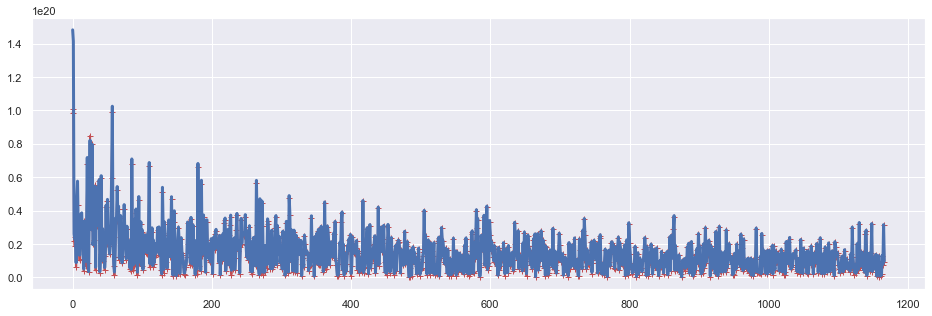

In [13]:
# Find the Learning curve
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
plt.figure(figsize=(16, 5))
plot_learning_curves(sgd_reg, x_train, y_train)

In [14]:
predictions_kaggle = sgd_reg.predict(x_kaggle_test)
new_df_test['SalePrice'] = predictions_kaggle
new_df_test[['Id', 'SalePrice']].to_csv('predictions-3.csv', index=False)

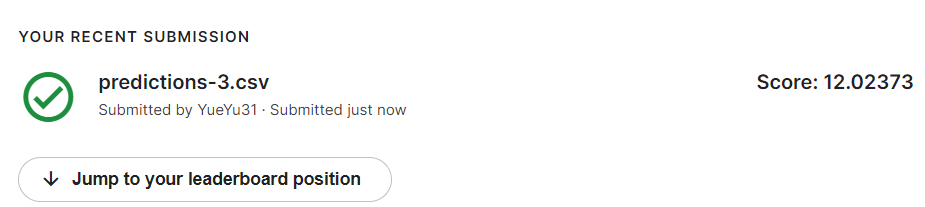

The Random Gradient model's score optimization is not ideal.The Cholesky model does not optimize fractions when alpha=1.

## Lasso Regression 

In [15]:
# Use Lasso model with alpha=0.1
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
print(lasso_reg.coef_)


[ 0.25725775 55.38230288 53.54687249 32.18812148  0.55368596]


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4432241.944356161, tolerance: 1629787.5
  model = cd_fast.enet_coordinate_descent(


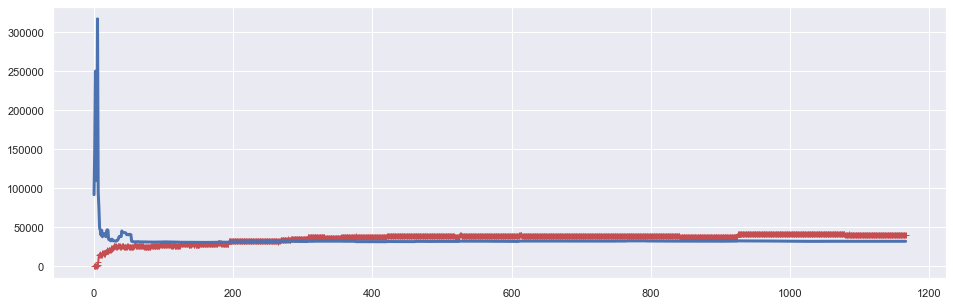

In [16]:
# Find the Learning curve
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
plt.figure(figsize=(16, 5))
plot_learning_curves(lasso_reg, x_train, y_train)

In [17]:
predictions_kaggle = lasso_reg.predict(x_kaggle_test)
new_df_test['SalePrice'] = predictions_kaggle
new_df_test[['Id', 'SalePrice']].to_csv('predictions-4.csv', index=False)

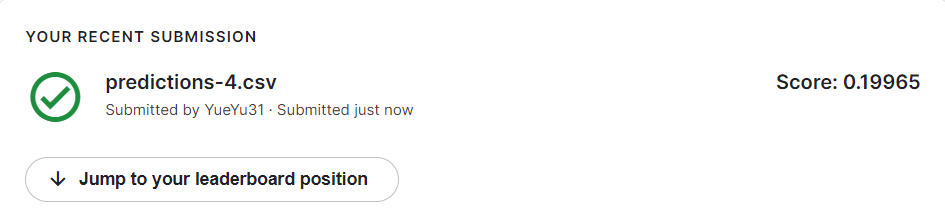

In [18]:
# Use Lasso model with alpha=1 
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(x_train, y_train)
print(lasso_reg.coef_)

[ 0.25725782 55.382302   53.54684699 32.18811928  0.55368602]


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


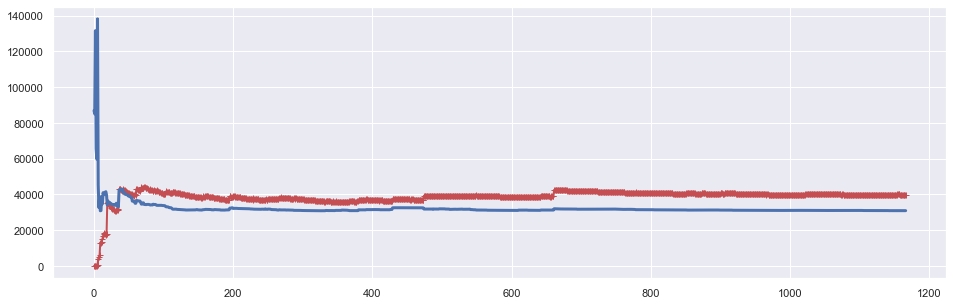

In [19]:
# Find the Learning curve
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
plt.figure(figsize=(16, 5))
plot_learning_curves(lasso_reg, x_train, y_train)

In [20]:
predictions_kaggle = lasso_reg.predict(x_kaggle_test)
new_df_test['SalePrice'] = predictions_kaggle
new_df_test[['Id', 'SalePrice']].to_csv('predictions-5.csv', index=False)

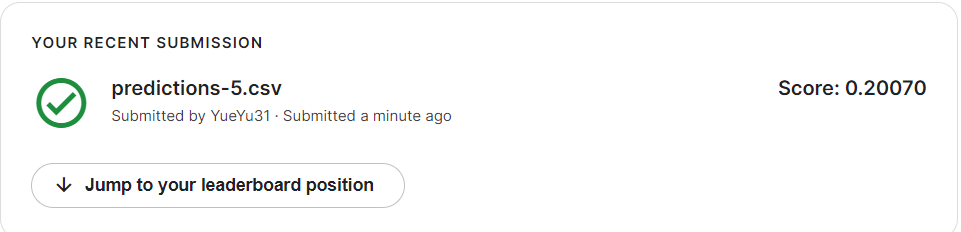

In the Lasso model, when I changed the penalty term (alpha) value from 0.1 to 1, it did not help to optimize the score.

## ElasticNet Regression

In [21]:
# Use ElasticNet model with alpha=0.1, l1_ratio=0.5
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x_train, y_train)

ElasticNet(alpha=0.1)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


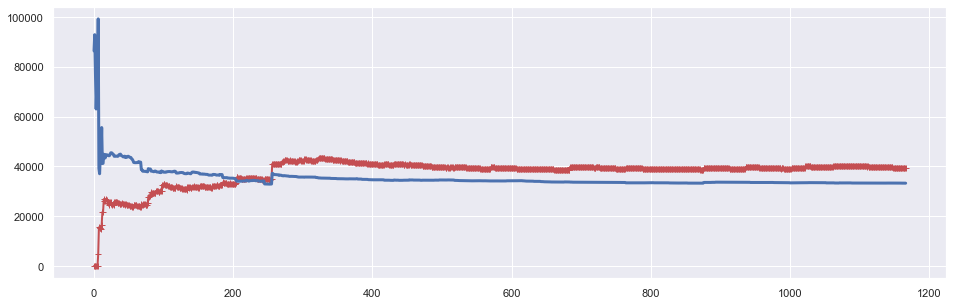

In [22]:
# Find the Learning curve
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
plt.figure(figsize=(16, 5))
plot_learning_curves(elastic_net, x_train, y_train)

In [23]:
predictions_kaggle = elastic_net.predict(x_kaggle_test)
new_df_test['SalePrice'] = predictions_kaggle
new_df_test[['Id', 'SalePrice']].to_csv('predictions-6.csv', index=False)

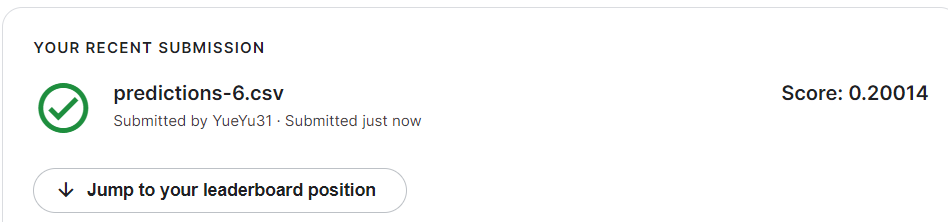

In [24]:
# Use ElasticNet model with alpha=1, l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(x_train, y_train)

ElasticNet(alpha=1)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


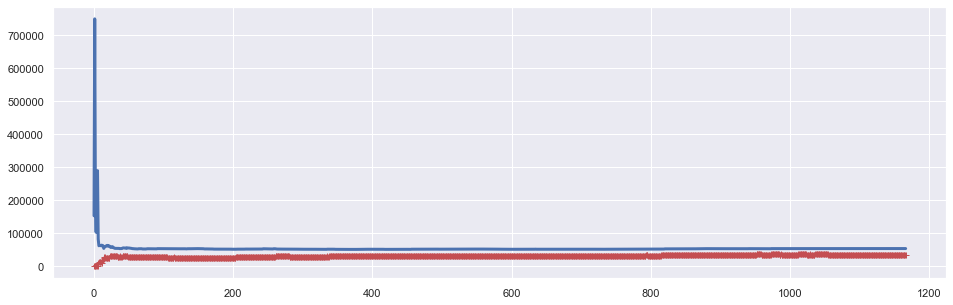

In [25]:
# Find the Learning curve
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
plt.figure(figsize=(16, 5))
plot_learning_curves(elastic_net, x_train, y_train)

In [26]:
predictions_kaggle = elastic_net.predict(x_kaggle_test)
new_df_test['SalePrice'] = predictions_kaggle
new_df_test[['Id', 'SalePrice']].to_csv('predictions-7.csv', index=False)

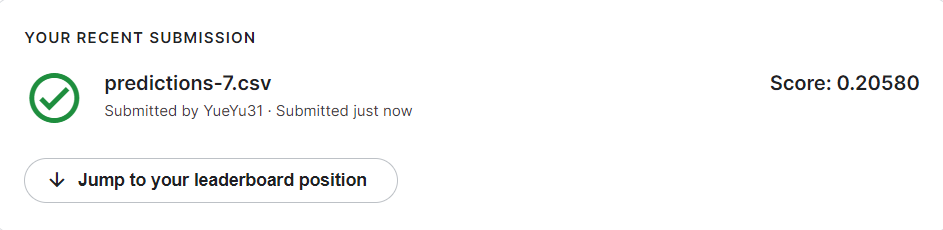

In the ElasticNet model, when I changed the penalty term (alpha) value from 0.1 to 1, it did not help to optimize the score.

Through the comparison test of the same set of features, the optimization of scores by Lasso regression is quite obvious in the existing model. I will add more features later and make predictions through Lasso regression.

## Transform Categorical Feature 


In [27]:
from category_encoders import *
from sklearn.datasets import load_boston
df_train_2 = pd.read_csv('train.csv')
df_test_2 = pd.read_csv('test.csv')

In [28]:
# Find Missing Data
df_missing_data = df_train_2.isnull().sum().sort_values(ascending=False)
df_missing_data = df_test_2.isnull().sum().sort_values(ascending=False)

In [29]:
# Clean colunmes with much missing data
new_df_train_2=df_train_2.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu','LotFrontage','GarageYrBlt','GarageCond', 'GarageType' ,'GarageFinish', 'GarageQual','BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond','BsmtFinType1','MasVnrArea','MasVnrType','Electrical','BsmtExposure','BsmtFinType2','MasVnrArea',])
print("Original number of columns in train",len(df_train_2.columns))
print("Updated number of columns in train",len(new_df_train_2.columns))
new_df_test_2=df_test_2.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu','LotFrontage','GarageYrBlt','GarageCond', 'GarageType' ,'GarageFinish', 'GarageQual','BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond','BsmtFinType1','MasVnrArea','MasVnrType','Electrical','BsmtExposure','BsmtFinType2','MasVnrArea',])
print("Original number of columns in test",len(df_test_2.columns))
print("Updated number of columns in test",len(new_df_test_2.columns))

Original number of columns in train 81
Updated number of columns in train 62
Original number of columns in test 80
Updated number of columns in test 61


In [30]:
df_train_3 = new_df_train_2[['MSSubClass','MSZoning','LotArea','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageCars','GarageArea','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SaleType','SaleCondition','SalePrice']]
y_train_3 = df_train_3['SalePrice']
x_train_3 = df_train_3[['MSSubClass','MSZoning','LotArea','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageCars','GarageArea','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SaleType','SaleCondition']]

In [31]:
enc = TargetEncoder(cols=['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','Heating','HeatingQC','CentralAir','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition'])
df_new_features = enc.fit_transform(x_train_3,y_train_3)
df_new_features['SalePrice'] = df_train_3['SalePrice']
df_new_features['Id']= df_train_2['Id']

In [32]:
# Find Correction
numerical = ['MSSubClass','MSZoning','LotArea','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageCars','GarageArea','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SaleType','SaleCondition','SalePrice']
df_numerical = df_new_features[numerical]
df_numerical_corr = df_numerical.corr()
df_numerical_corr

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.398889,0.107107,0.060462,0.275529,0.113630,-0.002857,0.118966,-0.020547,0.478433,...,0.219458,0.278081,-0.190103,0.031501,0.059777,0.037084,-0.028840,0.184810,0.192474,0.496302
MSZoning,0.398889,1.000000,0.149460,0.097471,0.218896,0.058160,-0.010136,0.100086,-0.001651,0.422162,...,0.134650,0.079439,-0.228253,0.036162,0.030914,0.026595,0.002991,0.158730,0.156980,0.327963
LotArea,0.107107,0.149460,1.000000,-0.197131,0.262915,0.151625,-0.010123,0.184937,0.379421,0.153270,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.023068,0.030785,0.263843
Street,0.060462,0.097471,-0.197131,1.000000,-0.009477,0.003153,-0.001682,0.013499,-0.179551,0.031497,...,-0.017990,-0.005664,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.029084,0.015468,0.041036
LotShape,0.275529,0.218896,0.262915,-0.009477,1.000000,0.134646,-0.030037,0.368438,0.132605,0.265918,...,0.171446,0.092377,-0.092981,0.038491,0.068206,0.026742,0.033781,0.045503,0.049728,0.276362
LandContour,0.113630,0.058160,0.151625,0.003153,0.134646,1.000000,0.001514,0.090681,0.225480,0.154487,...,0.094737,-0.020473,-0.075600,0.044385,0.001866,-0.027769,0.003524,0.080086,0.084802,0.160605
Utilities,-0.002857,-0.010136,-0.010123,-0.001682,-0.030037,0.001514,1.000000,-0.097703,0.006139,-0.027368,...,0.019692,-0.028199,0.009407,0.003046,-0.102365,0.001798,0.002296,0.032992,0.030839,0.014314
LotConfig,0.118966,0.100086,0.184937,0.013499,0.368438,0.090681,-0.097703,1.000000,0.060953,0.109644,...,0.084681,0.034173,-0.043955,0.052174,0.023085,0.038305,0.068320,-0.013373,-0.027385,0.144978
LandSlope,-0.020547,-0.001651,0.379421,-0.179551,0.132605,0.225480,0.006139,0.060953,1.000000,0.014976,...,0.095121,-0.030260,-0.006890,0.005348,0.057245,-0.016109,-0.005910,-0.053136,-0.052404,0.051784
Neighborhood,0.478433,0.422162,0.153270,0.031497,0.265918,0.154487,-0.027368,0.109644,0.014976,1.000000,...,0.250066,0.204699,-0.165441,0.017687,0.010153,-0.000363,-0.045716,0.324219,0.324788,0.738610


In [33]:
#Remove some low correction featrues (<0.4)
df_train_3 = new_df_train_2[['MSSubClass','MSZoning','Neighborhood','OverallQual','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterQual','Foundation','BsmtFinSF1','TotalBsmtSF','HeatingQC','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SaleType','SaleCondition','SalePrice']]
y_train_3 = df_train_3['SalePrice']
x_train_3 = df_train_3[['MSSubClass','MSZoning','Neighborhood','OverallQual','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterQual','Foundation','BsmtFinSF1','TotalBsmtSF','HeatingQC','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SaleType','SaleCondition']]

In [34]:
enc = TargetEncoder(cols=['MSSubClass','MSZoning','Neighborhood','Exterior1st','Exterior2nd','ExterQual','Foundation','HeatingQC','KitchenQual','SaleType','SaleCondition'])
df_new_features = enc.fit_transform(x_train_3,y_train_3)
df_new_features['SalePrice'] = df_train_3['SalePrice']
df_new_features['Id']= df_train_2['Id']

In [35]:
# Find Correction again 
numerical = ['MSSubClass','MSZoning','Neighborhood','OverallQual','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterQual','Foundation','BsmtFinSF1','TotalBsmtSF','HeatingQC','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SaleType','SaleCondition','SalePrice']
df_numerical = df_new_features[numerical]
df_numerical_corr = df_numerical.corr()
df_numerical_corr

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,ExterQual,Foundation,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.398889,0.478433,0.482006,0.585047,0.402728,0.364684,0.387905,0.384326,0.458478,...,0.357519,0.347617,0.286636,0.436546,0.391440,0.219458,0.278081,0.184810,0.192474,0.496302
MSZoning,0.398889,1.000000,0.422162,0.268471,0.456400,0.236527,0.145594,0.144966,0.248683,0.252257,...,0.224426,0.122634,0.186810,0.255757,0.253041,0.134650,0.079439,0.158730,0.156980,0.327963
Neighborhood,0.478433,0.422162,1.000000,0.685461,0.624817,0.496193,0.382928,0.388326,0.643784,0.567620,...,0.573577,0.308836,0.316490,0.567786,0.526210,0.250066,0.204699,0.324219,0.324788,0.738610
OverallQual,0.482006,0.268471,0.685461,1.000000,0.572323,0.550684,0.404018,0.410587,0.717161,0.572975,...,0.667558,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,0.339704,0.335205,0.790982
YearBuilt,0.585047,0.456400,0.624817,0.572323,1.000000,0.592855,0.571201,0.584596,0.570030,0.683910,...,0.490897,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,0.349968,0.356712,0.522897
YearRemodAdd,0.402728,0.236527,0.496193,0.550684,0.592855,1.000000,0.486558,0.504667,0.561439,0.575934,...,0.584128,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,0.345031,0.344397,0.507101
Exterior1st,0.364684,0.145594,0.382928,0.404018,0.571201,0.486558,1.000000,0.912114,0.433161,0.518952,...,0.401545,0.157062,0.079393,0.350343,0.309973,0.128201,0.187974,0.312548,0.309985,0.387869
Exterior2nd,0.387905,0.144966,0.388326,0.410587,0.584596,0.504667,0.912114,1.000000,0.443312,0.545636,...,0.410832,0.138109,0.055850,0.345848,0.310875,0.133120,0.195613,0.314207,0.302409,0.388748
ExterQual,0.384326,0.248683,0.643784,0.717161,0.570030,0.561439,0.433161,0.443312,1.000000,0.573290,...,0.713379,0.308125,0.252033,0.513909,0.492124,0.204759,0.293256,0.407038,0.406255,0.690933
Foundation,0.458478,0.252257,0.567620,0.572975,0.683910,0.575934,0.518952,0.545636,0.573290,1.000000,...,0.512468,0.180894,0.111927,0.455800,0.397079,0.185717,0.231002,0.335587,0.320917,0.506328


In [36]:
x_test_3 = new_df_test_2[['MSSubClass','MSZoning','Neighborhood','OverallQual','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterQual','Foundation','BsmtFinSF1','TotalBsmtSF','HeatingQC','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SaleType','SaleCondition']]
df_new_test_features = enc.transform(x_test_3)
df_new_test_features['Id']= df_test_2['Id']
df_new_test_features

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,ExterQual,Foundation,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,Id
0,185224.811567,131558.390100,145847.080000,5,1961,1961,213732.900971,214432.460317,144341.313466,149805.714511,...,139962.511565,5,0,1.0,730.0,140,0,173401.836622,175202.219533,1461
1,185224.811567,191004.994787,145847.080000,6,1958,1958,149841.645631,148386.065990,144341.313466,149805.714511,...,212116.023891,6,0,1.0,312.0,393,36,173401.836622,175202.219533,1462
2,239948.501672,191004.994787,192854.506329,5,1997,1998,213732.900971,214432.460317,144341.313466,225230.442040,...,139962.511565,6,1,2.0,482.0,212,34,173401.836622,175202.219533,1463
3,239948.501672,191004.994787,192854.506329,6,1998,1998,213732.900971,214432.460317,144341.313466,225230.442040,...,212116.023891,7,1,2.0,470.0,360,36,173401.836622,175202.219533,1464
4,200779.080460,191004.994787,310498.999995,8,1992,1992,163077.450450,167661.565217,231633.510246,225230.442040,...,212116.023891,5,0,2.0,506.0,0,82,173401.836622,175202.219533,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,138647.380952,126316.830275,98576.479855,4,1970,1970,231690.655738,230093.833333,144341.313466,149805.714511,...,139962.511565,5,0,0.0,0.0,0,0,173401.836622,175202.219533,2915
1455,138647.380952,126316.830275,98576.479855,4,1970,1970,231690.655738,230093.833333,144341.313466,149805.714511,...,139962.511565,6,0,1.0,286.0,0,24,173401.836622,146526.623762,2916
1456,185224.811567,191004.994787,156270.122449,5,1960,1996,213732.900971,214432.460317,144341.313466,149805.714511,...,139962.511565,7,1,2.0,576.0,474,0,173401.836622,146526.623762,2917
1457,147810.000186,191004.994787,156270.122449,5,1992,1992,163077.450450,161328.947368,144341.313466,225230.442040,...,139962.511565,6,0,0.0,0.0,80,32,173401.836622,175202.219533,2918


In [37]:
#diff_df = pd.merge(df_new_test_features['Id'], df_test_2['Id'], how='outer', indicator='Exist')
#diff_df = diff_df.loc[diff_df['Exist'] != 'both']
#diff_df 

In [38]:
df_train_new = df_new_features[['MSSubClass','MSZoning','Neighborhood','OverallQual','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterQual','Foundation','BsmtFinSF1','TotalBsmtSF','HeatingQC','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SaleType','SaleCondition','SalePrice']]
y_train_new = df_train_new['SalePrice']
x_train_new = df_train_new[['MSSubClass','MSZoning','Neighborhood','OverallQual','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterQual','Foundation','BsmtFinSF1','TotalBsmtSF','HeatingQC','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SaleType','SaleCondition']]

In [39]:
model_new = LinearRegression()
model_new.fit(x_train_new,y_train_new)
print(model_new.coef_)

[ 3.65572277e-02  6.76736430e-02  3.07736198e-01  1.11372645e+04
 -1.23154938e+02  4.11523223e+01 -8.77911857e-03  1.03021295e-01
  8.98310505e-02 -4.52790320e-02  1.90197409e+01  6.74890619e+00
  4.08932937e-02  2.69000244e+01  1.94239892e+01  1.79950756e+01
 -2.94461875e+03  1.60555012e-01  1.45719900e+03  6.20898563e+03
  9.03013378e+03  9.74125311e-01  3.11921541e+01  4.44419115e+00
  6.86706989e-02  1.13791473e-01]


In [40]:
x_kaggle_test = df_new_test_features[['MSSubClass','MSZoning','Neighborhood','OverallQual','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterQual','Foundation','BsmtFinSF1','TotalBsmtSF','HeatingQC','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SaleType','SaleCondition']]
x_kaggle_test[x_kaggle_test.isna().any(axis=1)]
x_kaggle_test = x_kaggle_test.fillna(0)



In [41]:
predictions_kaggle = model_new.predict(x_kaggle_test)
df_new_test_features['SalePrice'] = predictions_kaggle
df_new_test_features[['Id', 'SalePrice']].to_csv('predictions-10.csv', index=False)

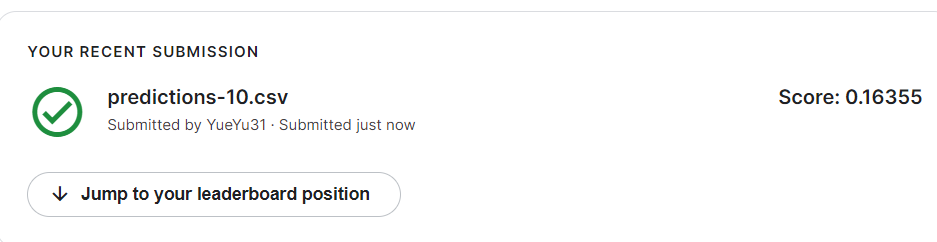

# Transform Categorical Feature with Lasso Regression

In [42]:
# Lasso alpha=0.1
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train_new, y_train_new)
print(lasso_reg.coef_)

[ 3.65602649e-02  6.76710149e-02  3.07737182e-01  1.11371415e+04
 -1.23160144e+02  4.11499694e+01 -8.77949219e-03  1.03020600e-01
  8.98314151e-02 -4.52783818e-02  1.90197069e+01  6.74881120e+00
  4.08938766e-02  2.69110713e+01  1.94347646e+01  1.79846436e+01
 -2.94380466e+03  1.60556358e-01  1.45704388e+03  6.20868896e+03
  9.02912391e+03  9.76745468e-01  3.11921880e+01  4.44364346e+00
  6.86717413e-02  1.13790458e-01]


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 758804627217.8359, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(


In [43]:
predictions_kaggle = lasso_reg.predict(x_kaggle_test)
df_new_test_features['SalePrice'] = predictions_kaggle
df_new_test_features[['Id', 'SalePrice']].to_csv('predictions-11-1.csv', index=False)

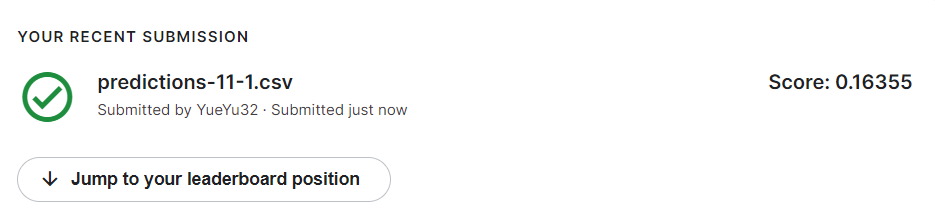

In [44]:
# Lasso alpha=1
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(x_train_new, y_train_new)
predictions_kaggle = lasso_reg.predict(x_kaggle_test)
df_new_test_features['SalePrice'] = predictions_kaggle
df_new_test_features[['Id', 'SalePrice']].to_csv('predictions-11-2.csv', index=False)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 711601976568.0325, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(


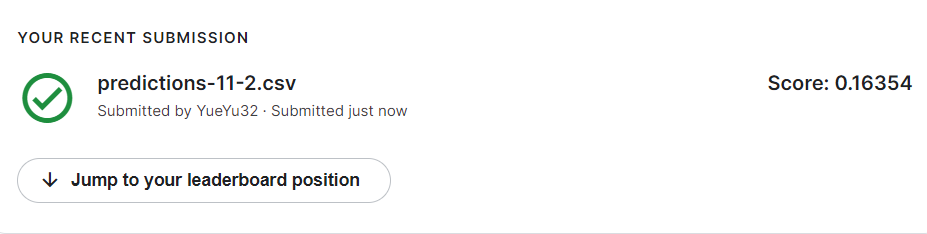

In [45]:
# Lasso alpha=10
lasso_reg = Lasso(alpha=10)
lasso_reg.fit(x_train_new, y_train_new)
predictions_kaggle = lasso_reg.predict(x_kaggle_test)
df_new_test_features['SalePrice'] = predictions_kaggle
df_new_test_features[['Id', 'SalePrice']].to_csv('predictions-11-3.csv', index=False)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410670986045.8453, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(


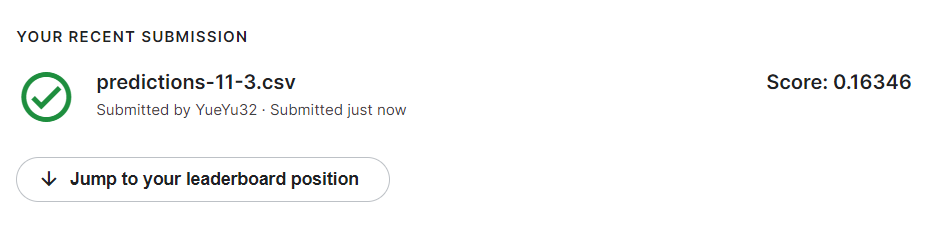

## Transform Categorical Feature with ElasticNet Regression

In [46]:
# Use ElasticNet model with alpha=0.1, l1_ratio=0

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0)
elastic_net.fit(x_train_new, y_train_new)
predictions_kaggle = elastic_net.predict(x_kaggle_test)
df_new_test_features['SalePrice'] = predictions_kaggle
df_new_test_features[['Id', 'SalePrice']].to_csv('predictions-12-1.csv', index=False)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 778169431949.047, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(


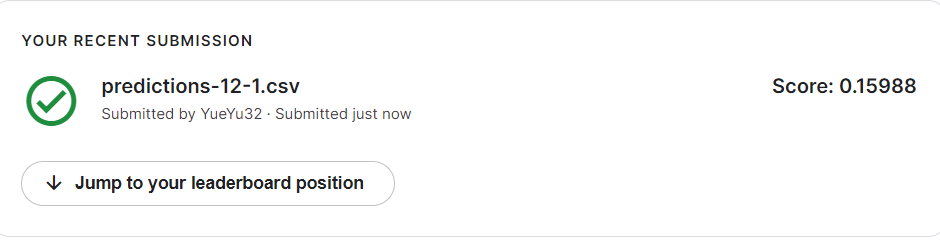

In [47]:
# Use ElasticNet model with alpha=0.1, l1_ratio=0.5

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x_train_new, y_train_new)
predictions_kaggle = elastic_net.predict(x_kaggle_test)
df_new_test_features['SalePrice'] = predictions_kaggle
df_new_test_features[['Id', 'SalePrice']].to_csv('predictions-12-2.csv', index=False)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769332527180.5284, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(


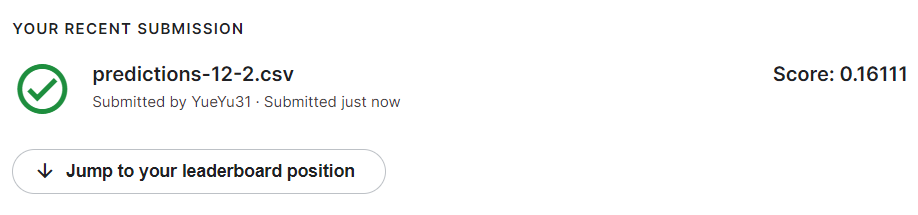

In [48]:
# Use ElasticNet model with alpha=0.1, l1_ratio=1

elastic_net = ElasticNet(alpha=0.1, l1_ratio=1)
elastic_net.fit(x_train_new, y_train_new)
predictions_kaggle = elastic_net.predict(x_kaggle_test)
df_new_test_features['SalePrice'] = predictions_kaggle
df_new_test_features[['Id', 'SalePrice']].to_csv('predictions-12-3.csv', index=False)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 758804627217.8359, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(


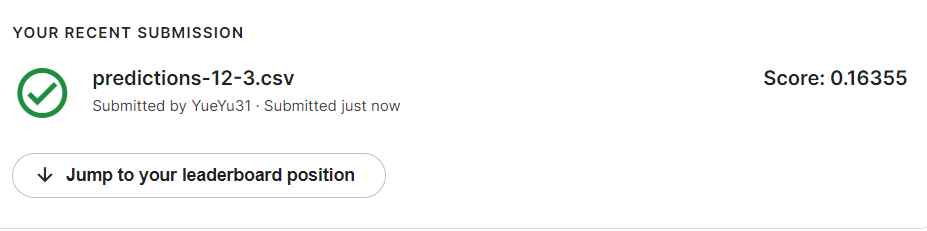

In [49]:
# Use ElasticNet model with alpha=0.5, l1_ratio=0

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0)
elastic_net.fit(x_train_new, y_train_new)
predictions_kaggle = elastic_net.predict(x_kaggle_test)
df_new_test_features['SalePrice'] = predictions_kaggle
df_new_test_features[['Id', 'SalePrice']].to_csv('predictions-12-4.csv', index=False)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 803113100279.8293, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(


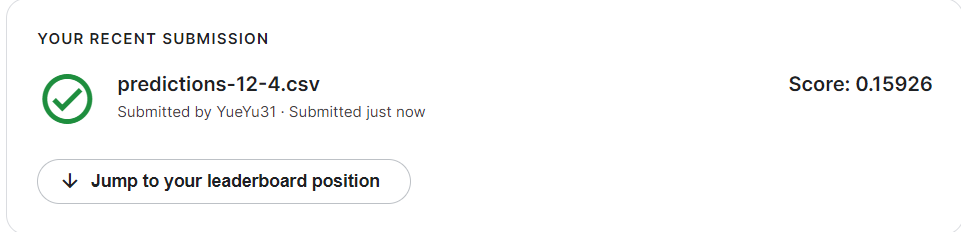

0.15926 is the best score I've gotten since using ElasticNet. ElastciNet also proved to be a good optimizer compared to the initial linear regression results.